<a href="https://colab.research.google.com/github/Harshpatel44/simple-neural-net/blob/master/neural%20net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from numpy.random import default_rng
import time
rng = default_rng()

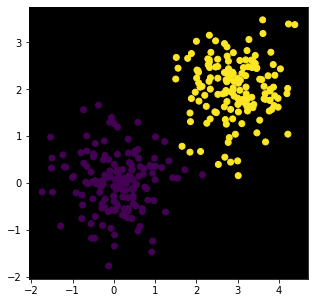

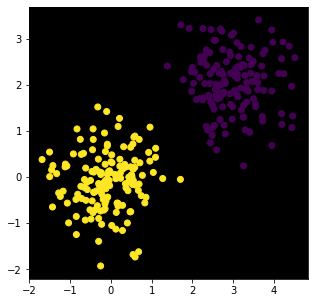

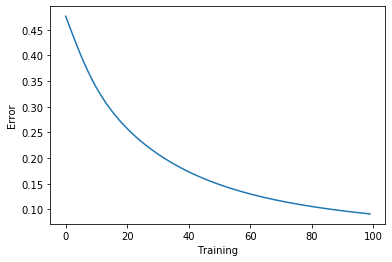

Training Accuracy 90.89%


In [72]:
#Weights
np.random.seed(0)
class data_set1:
  def __init__(self):
    self.cov1= [[0,0],[0,0]]  #covariance for class1
    self.cov2=[[0,0],[0,0]]   #covariance for class2   
    
    # method to adjust noise
  def noise(self,amt1,amt2=0):             
    n1=(3.5 - 0.4)*(amt1) + 0.4  #3.5 is max covariance and 0.4 is min covariance taken for noise
    self.cov1=[[n1,0],[0,n1]]
    if(amt2==0):
      amt2=amt1
    n2=(3.5 - 0.4)*(amt2) + 0.4
    self.cov2=[[n2,0],[0,n2]]
  #method to create data
  def create(self,n=2,items=100,noise=0):
    self.noise(noise,noise)
    self.n= n
    
    self.items= int(np.round(items/n))    # items per class =  all items / n 
    mx = rng.choice(int(self.n), size=self.n, replace=False)  # random x value of mean 
    my = rng.choice(int(self.n), size=self.n, replace=False)  # random y value of mean
    for i in range(self.n):
        if(i==0):
          x1, y1 = np.random.multivariate_normal([mx[i]*3,my[i]*2], self.cov1, self.items).T  #class1
          self.d1_data = np.array([x1,y1,np.zeros(x1.shape)+i])
        else:
          x2, y2 = np.random.multivariate_normal([mx[i]*3,my[i]*2], self.cov2, self.items).T  #class2
          self.d1_data=np.append(self.d1_data,[x2,y2,np.zeros(x1.shape)+i],axis=1)
    #appending both classes to 1 array and also adding another column of labels
    self.d1_data=self.d1_data.T
    return self.d1_data
  def plot(self):
    plt.figure(figsize=(5,5))
    plt.scatter(self.d1_data[:,0],self.d1_data[:,1],c=self.d1_data[:,2])
    
    ax = plt.gca()
    ax.set_facecolor('xkcd:salmon')
    ax.set_facecolor((0, 0, 0))
    #plt.axis([-6,6,-6,6])
    plt.show()

obj1=data_set1()
X=obj1.create(2,300,0.00)   #class,items,noise
np.random.shuffle(X)
obj1.plot()

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))


y_train=X[0:10,-1]
X_train=X[0:10,:-1]
# print(X)
# print(y_train)
# input()
w0 = 2*np.random.random((2, 5)) - 1 #for input   - 4 inputs, 3 outputs
w1 = 2*np.random.random((5, 1)) - 1 #for layer 1 - 5 inputs, 3 outputs

#learning rate
n = 0.1

#Errors - for graph later
errors = []

#Train
for i in range(100):

    #Feed forward
    layer0 = X_train
    
    layer1 = sigmoid(np.dot(layer0, w0))
    
    layer2 = sigmoid(np.dot(layer1, w1))
    
    
    #Back propagation using gradient descent
    layer2_error = np.reshape(y_train,(y_train.shape[0],1)) - layer2
    # print(y_train.shape)
    # print(layer2.shape)
    # print(layer2_error.shape)
    # input()
    #print('layer2_error:',layer2_error.shape)
    #print('sigma:',sigmoid_deriv(layer2).shape)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    #print('layer2_delta:',layer2_delta.shape)
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

#Plot the accuracy chart
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()
        
print("Training Accuracy " + str(round(accuracy,2)) + "%")